# k Nearest Neighbors
## Classification
Реализуйте алгоритм к ближайших соседей. 
Создадим искуственный набор данных из 100 наблюдений с 3 классами.
Необходимо реализовать функцию на входе которой:
- тренировочный набор данных (признаки и метки классов);
- тестовый набор данных (признаки);
- $k$ - количество ближайших соседей.

На выходе функция должна возвращать метки тестового набора данных. 
В качестве расстояния между объектами следует использовать Эвклидову меру.

**Алгоритм к ближайших соседей:**

Для каждого объекта тестового набора данных:
1. вычисление расстояний между всеми объектами тренировочного набора;
2. определение $k$ наименьших расстояний;
3. определение классов для $k$ найденных объектов;
4. присваивание метки тестовому объекту класса, который превалирует среди найденных объектов.

В многоклассовой модели может возникнуть неопределенность, что в 3 найденных объектак будут присутсвовать разные классы. В этом случае необходимо присваивать класс случайным образом.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from collections import Counter

In [2]:
X, Y = make_blobs(n_samples = 100, n_features=2, centers=5, cluster_std = 2, random_state=24)

Text(0.5,1,'Initial data')

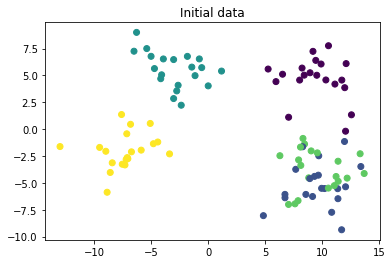

In [3]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Initial data')

In [4]:
def find_dist(obj, points):
    dist_list = list()
    for index, point in enumerate(points):
        dist = np.linalg.norm(obj-point)
        dist_list.append((dist, index))
    return sorted(dist_list, key=lambda x: x[0])
    
    
def funct_kNN(x_train, y_train, x_test, k):
    y = list() 
    for test_point in x_test:
        close_k = find_dist(test_point, x_train)[:k]
        close_labels = [y_train[point[1]] for point in close_k]
        cnt = Counter(close_labels)
        y.append(cnt.most_common(1)[0][0])
    return np.array(y)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=40)
for k in [1, 3, 5, 7, 9]:
    y = funct_kNN(X_train, y_train, X_test, k)
    print('k = ' + str(k) + ' accuracy = ' + str(accuracy_score(y_test, y)))

k = 1 accuracy = 0.8
k = 3 accuracy = 0.84
k = 5 accuracy = 0.82
k = 7 accuracy = 0.86
k = 9 accuracy = 0.8


Для корректного анализа построенного классификатора, разбейте исходный набор данных на тренировочный и тестовый.
Проверьте качество классификации для различных параметров $k$ (1, 3, 5, 7, 9) метрикой точность (Accuracy). Точность это отношение количества правильно классифицированных объектов ко всему количеству объектов.

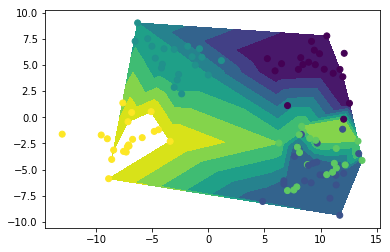

In [7]:
plt.tricontourf(X_test[:,0], X_test[:,1], y)
plt.scatter(X[:,0], X[:,1], c = Y)

Постройте разделающие поверхности, которые строит классификатор

## Regression
Напишите функцию для регрессии методом к ближайших соседей.

Для проверки вашего регрессионной модели создайте функцию синуса в диапазоне [0, 5] и возьмите в этом диапазоне 10 случайных точек как тренеровочную выборку. 
Задача: предсказать функцию на всем диапазоне [0, 5] для всех возможных значений параметра $k$.

$y = sin(x)$

**Алгоритм регрессии:**

Для каждого тестового обекта:
1. вычисление расстояний между всеми тренировочными объектами (можно использовать просто разницу по модулю между признаками объектов, так как у нас всего один признак в задаче);
2. нахождение $k$ объектов с минимальными расстояниями;
3. вычисление среднего значения по к найденным объектам и присваивание этого значения тестовому объекту.

In [8]:
from math import sin

X = np.linspace(0.0, 5.0, num=25)
y = [sin(dot) for dot in X]

In [9]:
def funct_kNN_reg(x_train, y_train, x_test, k):
    y = list() 
    for test_point in x_test:
        close_k = find_dist(test_point, x_train)[:k]
        close_meanings = [y_train[point[1]] for point in close_k]
        y.append(np.mean(close_meanings))
    return y

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
for k in [1, 3, 5, 7, 9]:
    y_pred = funct_kNN_reg(X_train, y_train, X_test, k)
    print('k = ' + str(k) + ' error = ' + str(mean_absolute_error(y_test, y_pred)))

k = 1 error = 0.13972020972972904
k = 3 error = 0.18438287629937836
k = 5 error = 0.2510628834535097
k = 7 error = 0.3210350110712415
k = 9 error = 0.3973635952840676


Постройте на одном графике исходную функцию, тренировочные объекты и предсказанные функции для каждого значения $k$.

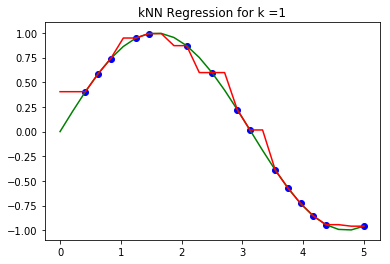

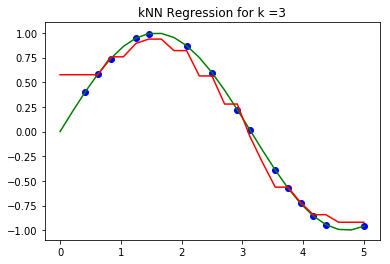

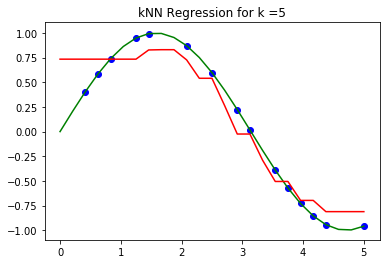

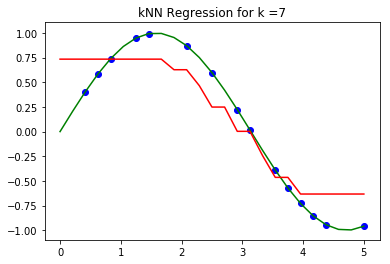

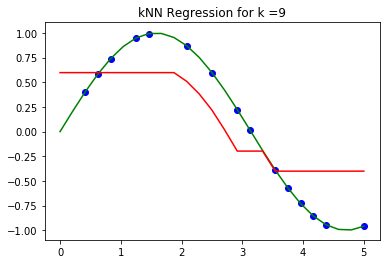

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
for k in [1, 3, 5, 7, 9]:
    y_pred = funct_kNN_reg(X_train, y_train, X, k)
    plt.scatter(X_train, y_train, c='blue')
    plt.plot(X, y, c='green')
    plt.plot(X, y_pred, c='red')
    plt.title('kNN Regression for k ={}'. format(k))
    plt.show()